## Neutrino 2 flavor

In [1]:
import numpy as np
import matplotlib.pyplot as plt


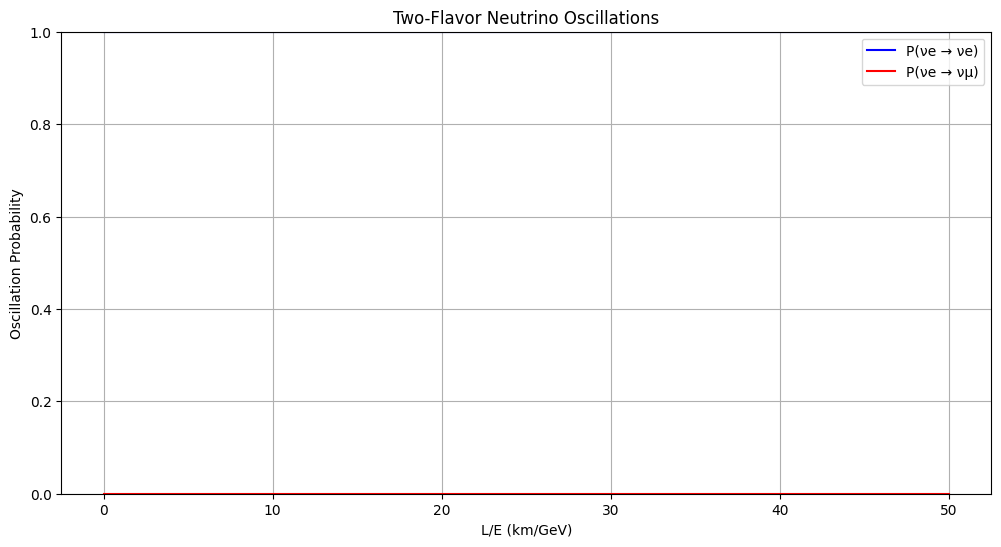

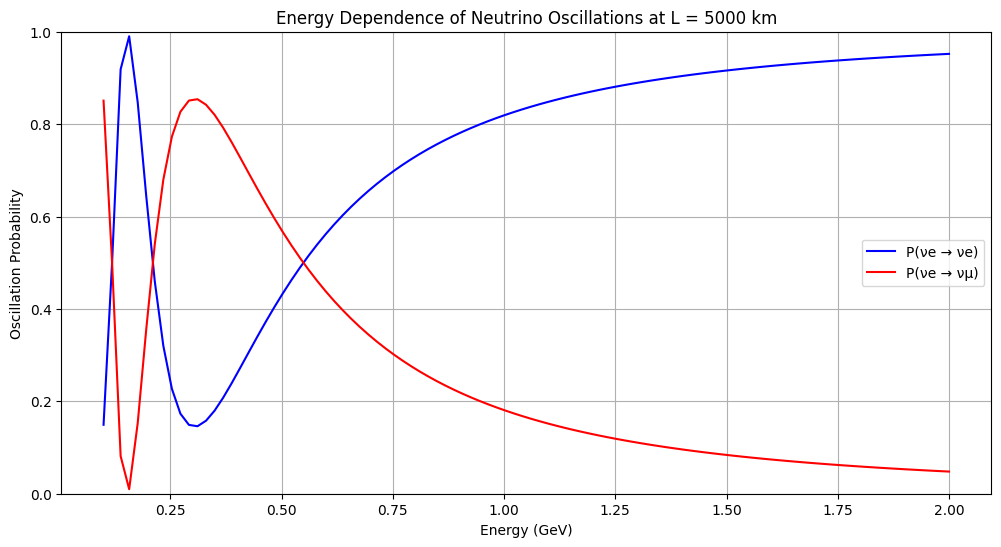

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Physical constants (in natural units where ℏ = c = 1)
delta_m_squared = 7.53e-5  # Mass-squared difference in eV²
mixing_angle = 0.59  # Mixing angle in radians (approximately 33.8 degrees)

# Create mixing matrix
def get_mixing_matrix(theta):
    return np.array([
        [np.cos(theta), np.sin(theta)],
        [-np.sin(theta), np.cos(theta)]
    ])

# Calculate oscillation probability
def calculate_oscillation(L_over_E, dm2, theta):
    """
    Calculate oscillation probability using the standard formula:
    P(νe → νμ) = sin²(2θ) * sin²(1.27 * Δm² * L/E)
    L/E in km/GeV, Δm² in eV²
    """
    sin2_2theta = np.sin(2 * theta)**2
    P_emu = sin2_2theta * np.sin(1.27 * dm2 * L_over_E)**2
    P_ee = 1 - P_emu
    return P_ee, P_emu

# Set up simulation parameters
L_over_E = np.linspace(0, 50, 1000)  # L/E in km/GeV

# Calculate oscillation probabilities
P_ee = np.zeros_like(L_over_E)
P_emu = np.zeros_like(L_over_E)

for i, x in enumerate(L_over_E):
    P_ee[i], P_emu[i] = calculate_oscillation(x, delta_m_squared, mixing_angle)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(L_over_E, P_ee, label='P(νe → νe)', color='blue')
plt.plot(L_over_E, P_emu, label='P(νe → νμ)', color='red')
plt.xlabel('L/E (km/GeV)')
plt.ylabel('Oscillation Probability')
plt.title('Two-Flavor Neutrino Oscillations')
plt.grid(True)
plt.legend()
plt.ylim(0, 1)
plt.show()

# Energy dependence at fixed baseline
L = 5000  # Fixed baseline in km (similar to T2K experiment)
E_range = np.linspace(0.1, 2.0, 100)  # Energy in GeV
L_over_E_range = L / E_range

P_ee_E = np.zeros_like(E_range)
P_emu_E = np.zeros_like(E_range)

for i, x in enumerate(L_over_E_range):
    P_ee_E[i], P_emu_E[i] = calculate_oscillation(x, delta_m_squared, mixing_angle)

plt.figure(figsize=(12, 6))
plt.plot(E_range, P_ee_E, label='P(νe → νe)', color='blue')
plt.plot(E_range, P_emu_E, label='P(νe → νμ)', color='red')
plt.xlabel('Energy (GeV)')
plt.ylabel('Oscillation Probability')
plt.title(f'Energy Dependence of Neutrino Oscillations at L = {L} km')
plt.grid(True)
plt.legend()
plt.ylim(0, 1)
plt.show()